In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import numpy as np
import json
import seaborn as sns

In [6]:
modelling_df = pd.read_csv('Dataset/output_dataset.csv')

In [7]:
# Convert 'country', 'account_currency', 'Trading_Method' and 'active' to categorical
modelling_df['country'] = modelling_df['country'].astype('category')
modelling_df['account_currency'] = modelling_df['account_currency'].astype('category')
modelling_df['Trading_Method'] = modelling_df['Trading_Method'].astype('category')
modelling_df['active'] = modelling_df['active'].astype('category')
modelling_df['has_credit'] = modelling_df['has_credit'].astype('category')

In [8]:
modelling_df

,login,country,account_currency,Trading_Frequency,Total_Trades,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,...,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,has_credit,active,net_deposit_frequency_ratio,Trading_Method,longevity,longevity_bin
0,524978,Austria,EUR,9.802817,1392,47.485632,1.230632,4.044965e+08,-3.415139,9.333333,...,-6.935588,-1.481077,25.668214,-148.587567,0.0,False,0.056225,Expert,142,2
1,524979,France,USD,20.504673,2194,49.635369,0.013943,6.724644e+03,-264.410462,3.500000,...,0.000000,-0.111285,-0.837867,6.950570,0.0,False,0.047809,Mobile,107,2
2,760487,Singapore,SGD,5.307692,69,15.942029,0.012609,2.783882e+03,-3403.656636,1.000000,...,0.000000,0.002172,-10.232797,2.490144,0.0,False,0.004819,Expert,13,0
3,804664,Malaysia,USD,9.444444,85,63.529412,0.018706,5.490400e+03,17.604088,6.000000,...,0.000000,-0.023176,-0.524588,0.167482,0.0,False,0.007246,Mobile,9,0
4,804687,Australia,AUD,1.301075,484,51.239669,0.019773,5.271755e+05,-45.416080,2.769231,...,-0.101129,-0.009749,-0.210692,2.798054,0.0,False,0.022388,Mobile,372,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,88944953,Canada,CAD,0.141732,54,37.037037,0.041667,1.621176e+07,-24.464597,3.333333,...,0.000000,-0.005931,-0.134167,0.122249,0.0,True,0.004914,Mobile,381,5
5721,88944971,Malaysia,USD,4.420000,442,46.153846,1.389367,1.249156e+09,-298.590702,7.000000,...,0.000000,-5.085113,-51.760588,1.870890,0.0,False,0.002625,Expert,100,2
5722,88945034,Singapore,USD,10.413043,479,40.083507,0.043278,1.522641e+07,-70.501778,11.333333,...,-0.256347,-0.000271,-1.519937,0.000000,0.0,False,0.000000,Expert,46,1
5723,88945038,Singapore,SGD,5.162055,1306,58.805513,0.078913,1.824879e+04,140.220508,4.111111,...,-0.700736,-0.125105,-0.125379,0.000000,0.0,False,0.000000,Expert,253,3


In [9]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   login                        5725 non-null   int64   
 1   country                      5725 non-null   category
 2   account_currency             5725 non-null   category
 3   Trading_Frequency            5725 non-null   float64 
 4   Total_Trades                 5725 non-null   int64   
 5   Buy_Percentage               5725 non-null   float64 
 6   Average_Volume               5725 non-null   float64 
 7   Average_Volume_USD           5725 non-null   float64 
 8   Average_DPM                  5725 non-null   float64 
 9   Unique_Symbols_Traded        5725 non-null   float64 
 10  Peak_Trading_Times           5725 non-null   int64   
 11  Ratio_Profitable_Trades      5725 non-null   float64 
 12  Profit_Loss_Variability      5725 non-null   float64 
 13  Ave

In [10]:
modelling_df['longevity'].describe()

count    5725.000000
mean       45.232664
std        70.013825
min         0.000000
25%         2.000000
50%        15.000000
75%        60.000000
max       415.000000
Name: longevity, dtype: float64

In [11]:
for column in modelling_df.columns:
    print(f"Statistics for {column}:")
    print(modelling_df[column].describe())
    print("\n")

Statistics for login:
count    5.725000e+03
mean     4.260059e+06
std      1.654573e+07
min      5.249780e+05
25%      8.148130e+05
50%      8.215830e+05
75%      7.056823e+06
max      1.000055e+09
Name: login, dtype: float64


Statistics for country:
count          5725
unique          140
top       Indonesia
freq           1209
Name: country, dtype: object


Statistics for account_currency:
count     5725
unique       8
top        USD
freq      3901
Name: account_currency, dtype: object


Statistics for Trading_Frequency:
count     5725.000000
mean        24.677048
std        710.948151
min          0.010178
25%          1.000000
50%          2.486111
75%          7.000000
max      46509.000000
Name: Trading_Frequency, dtype: float64


Statistics for Total_Trades:
count     5725.000000
mean       242.507424
std       1023.377574
min          1.000000
25%          8.000000
50%         33.000000
75%        142.000000
max      46509.000000
Name: Total_Trades, dtype: float64


Statistics

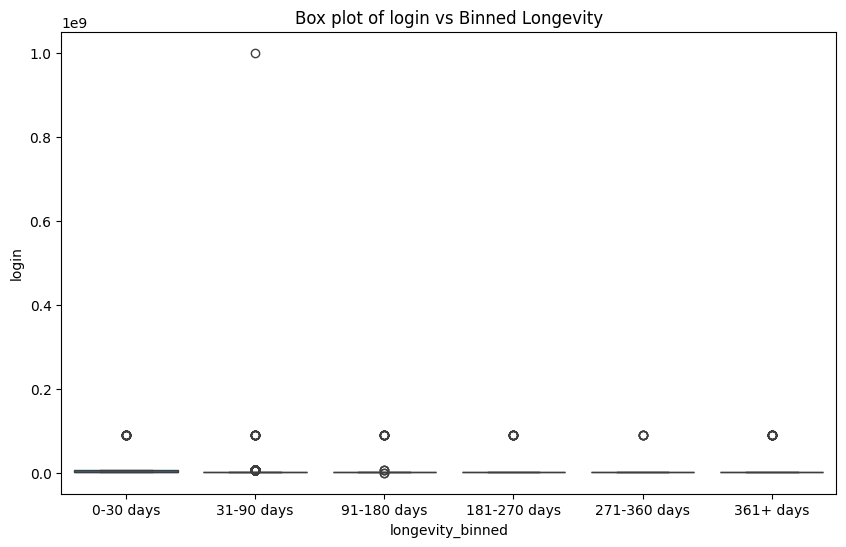

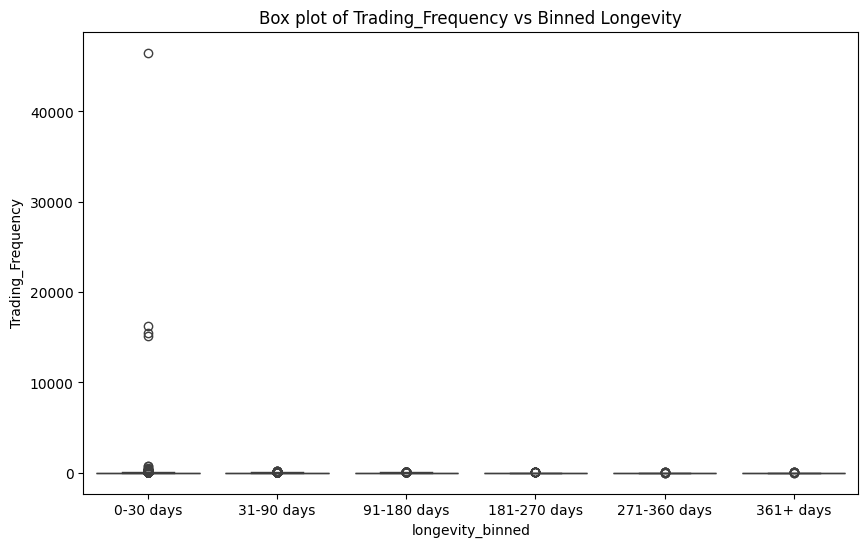

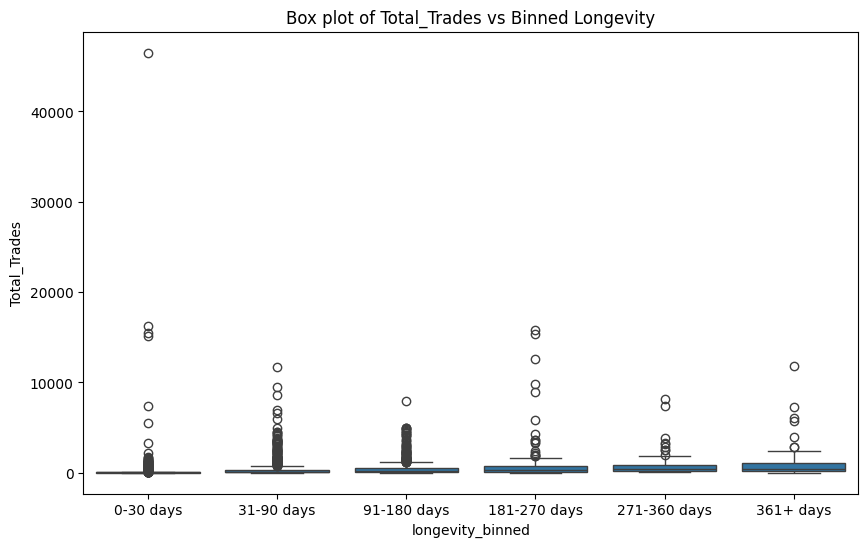

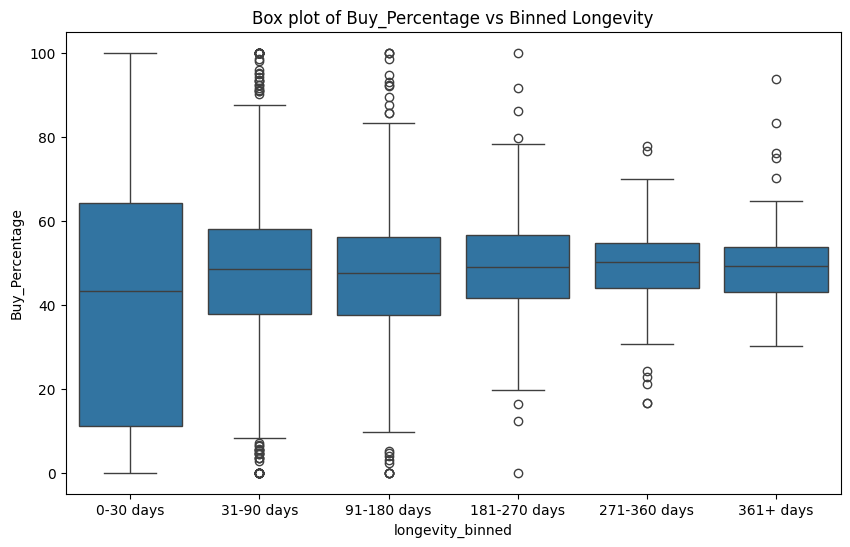

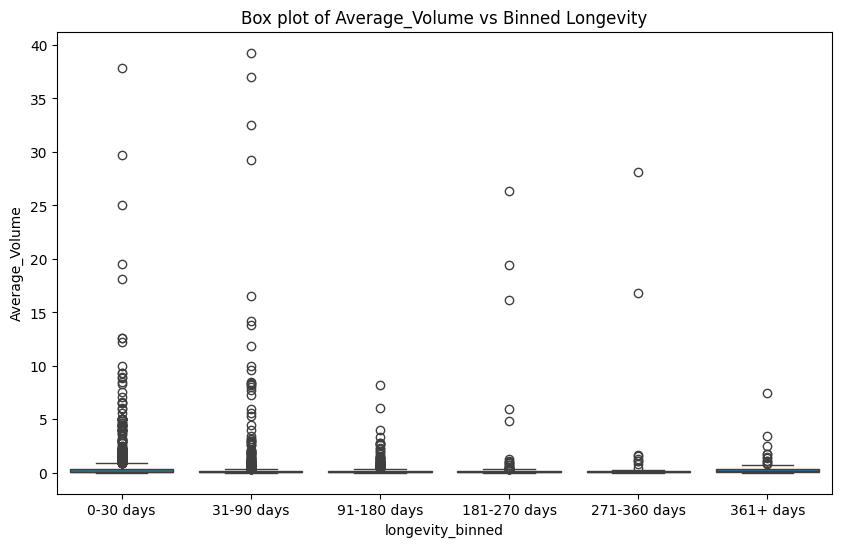

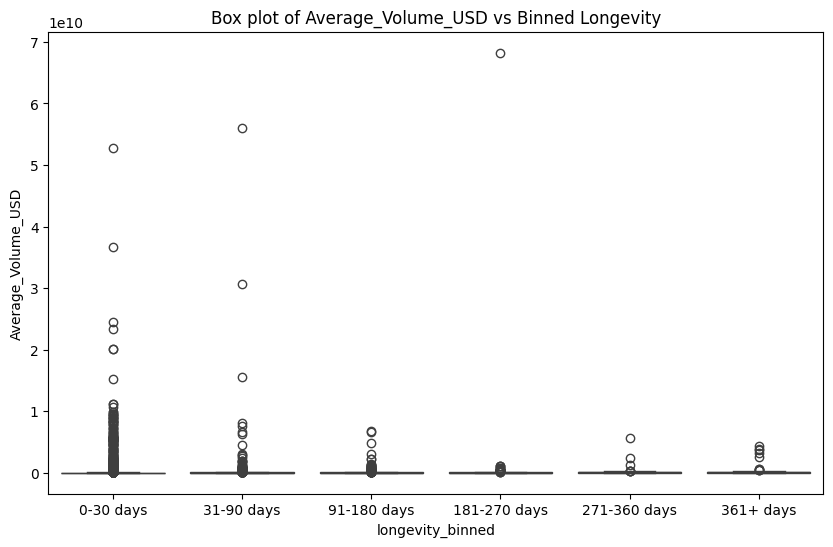

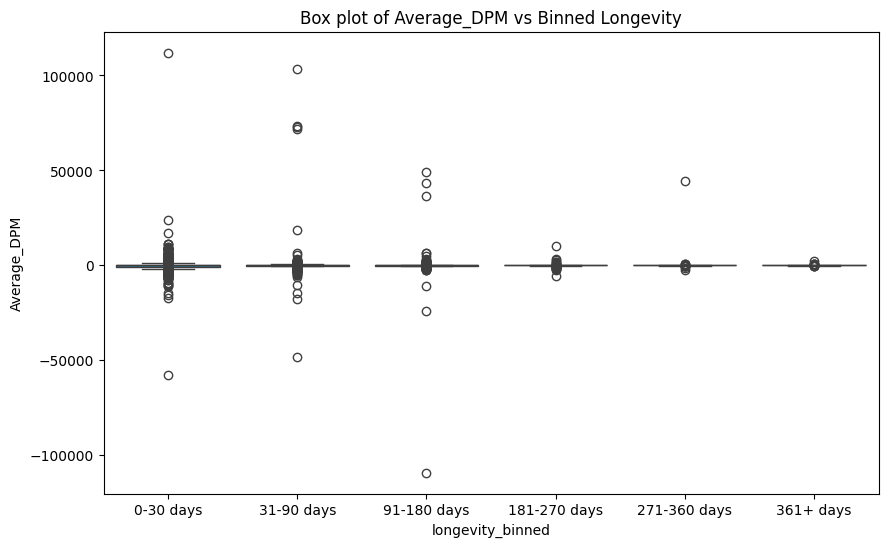

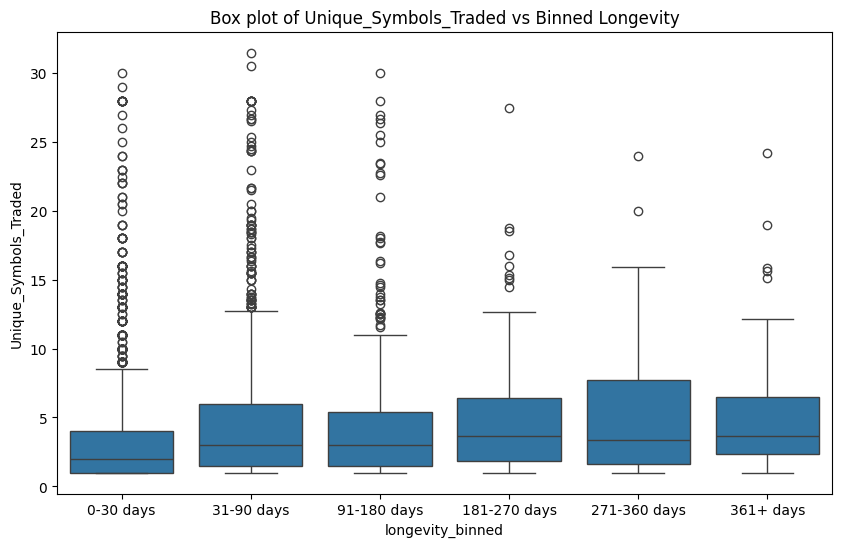

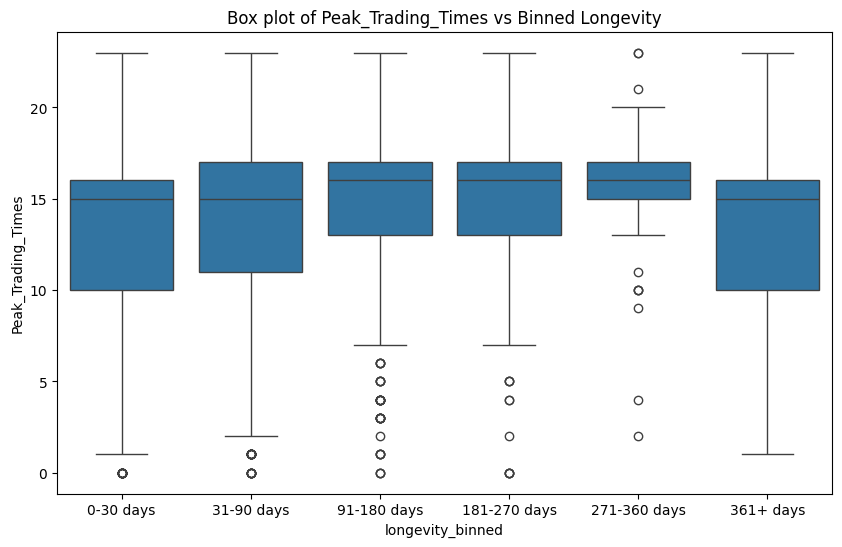

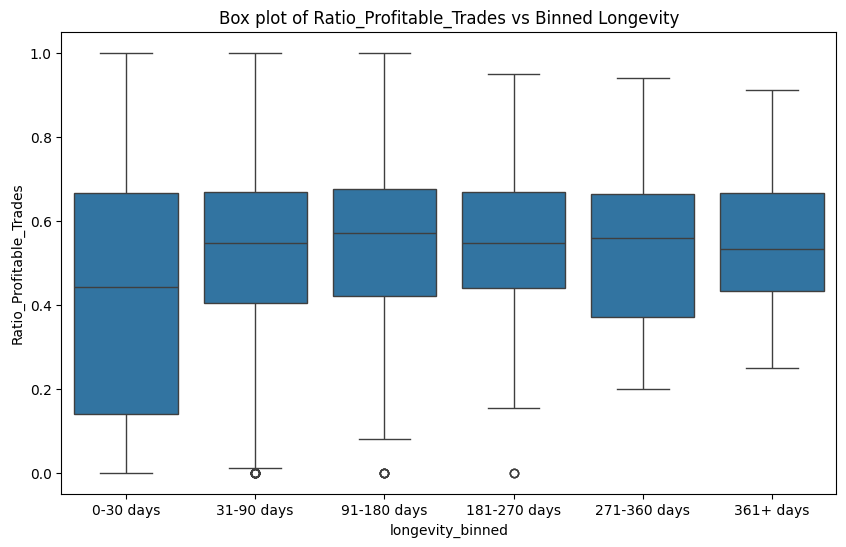

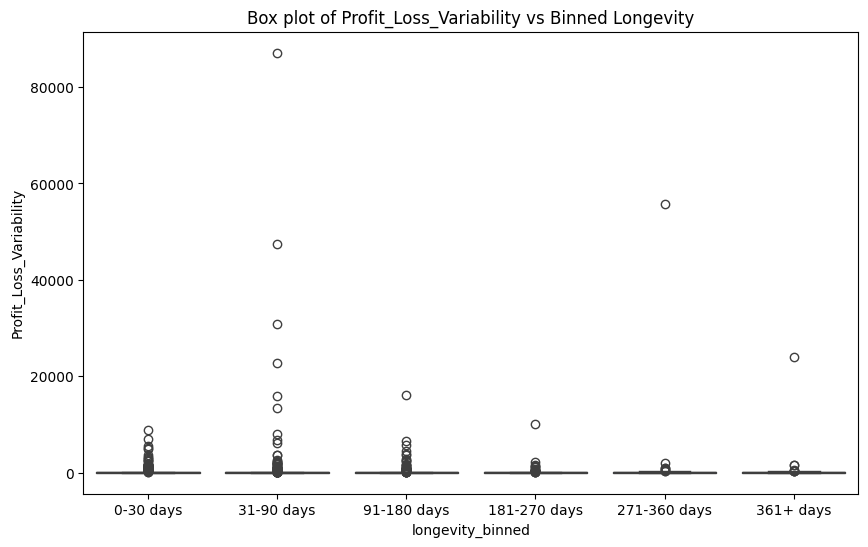

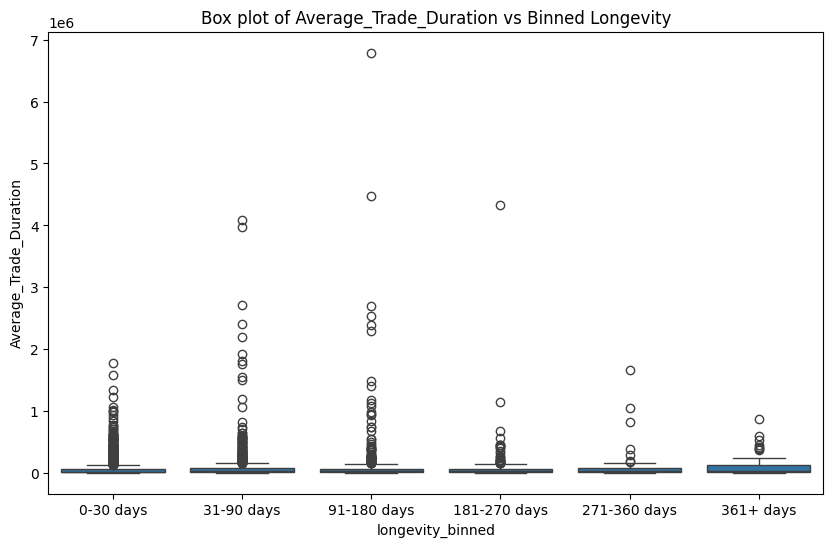

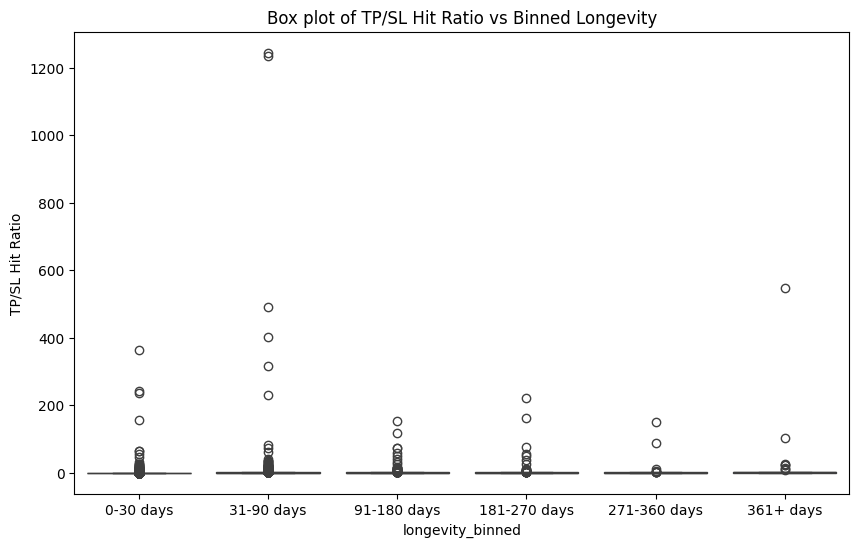

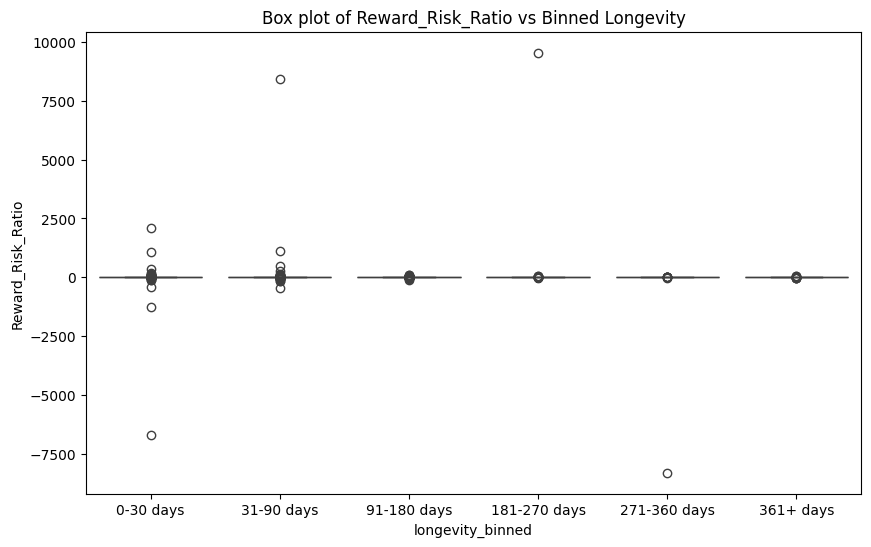

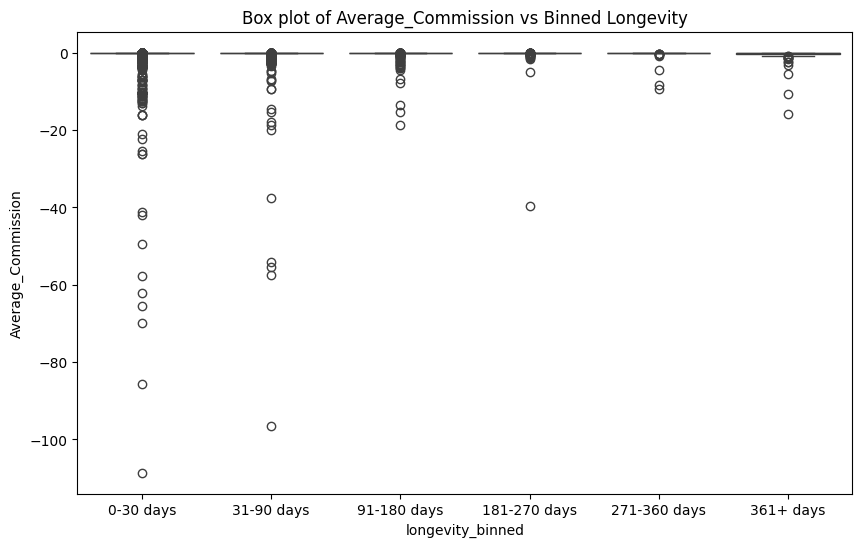

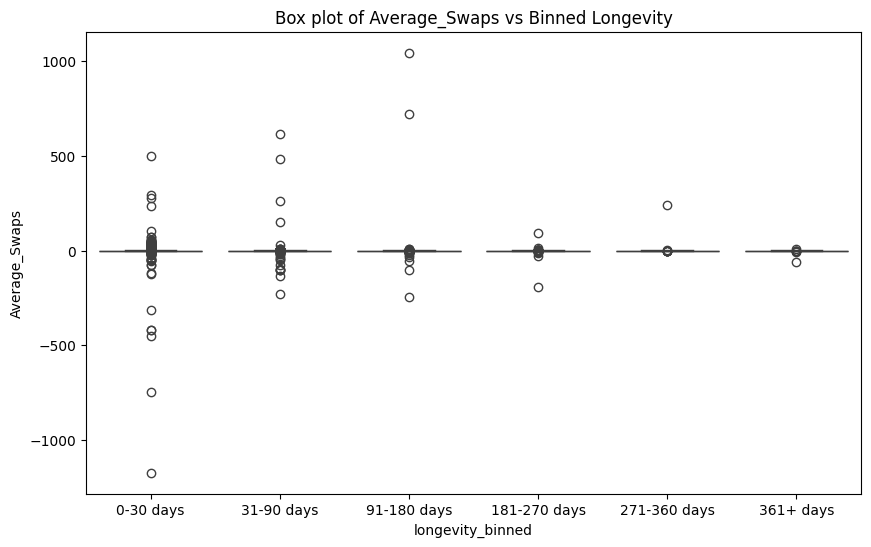

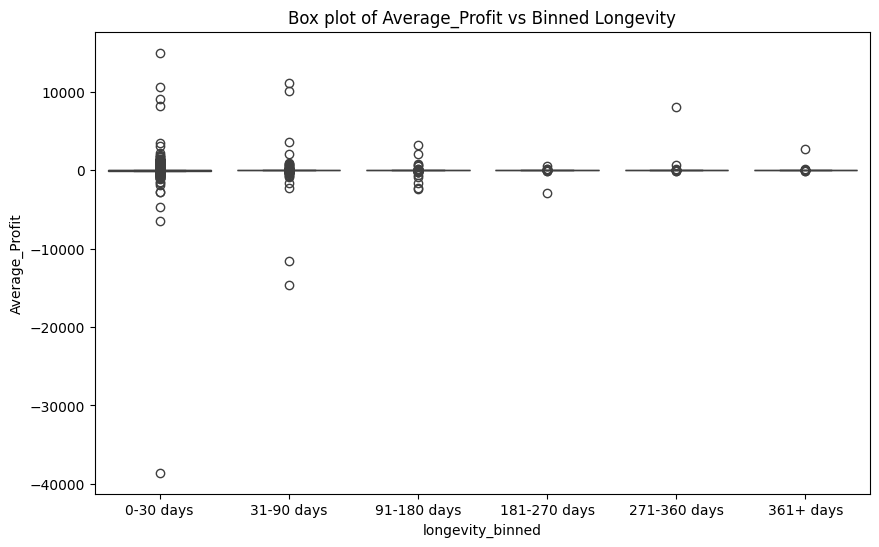

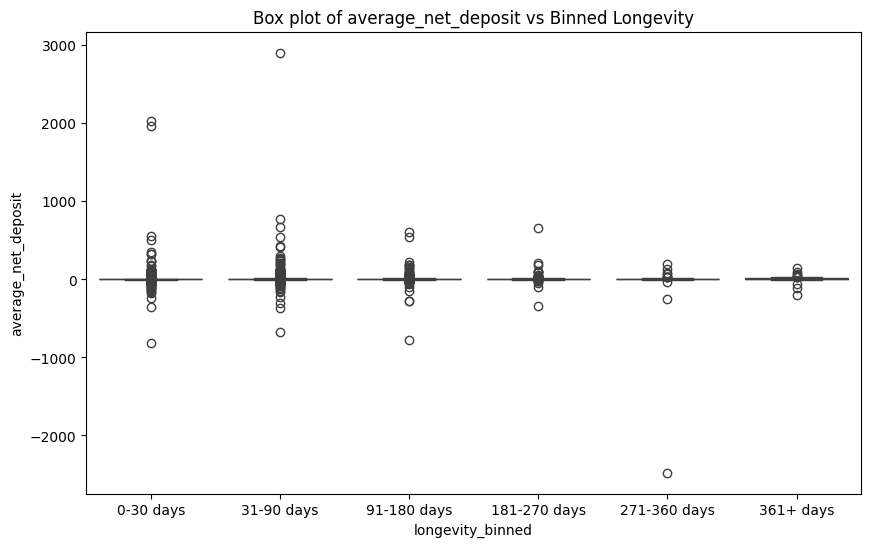

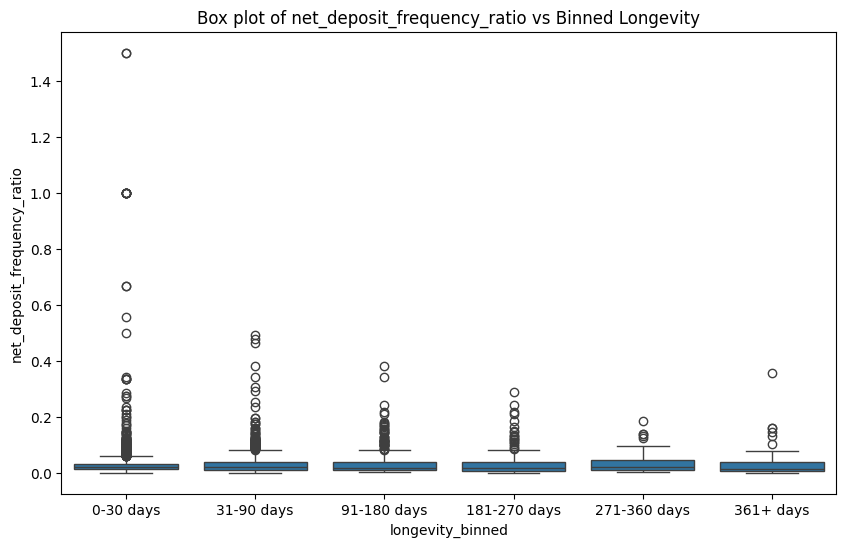

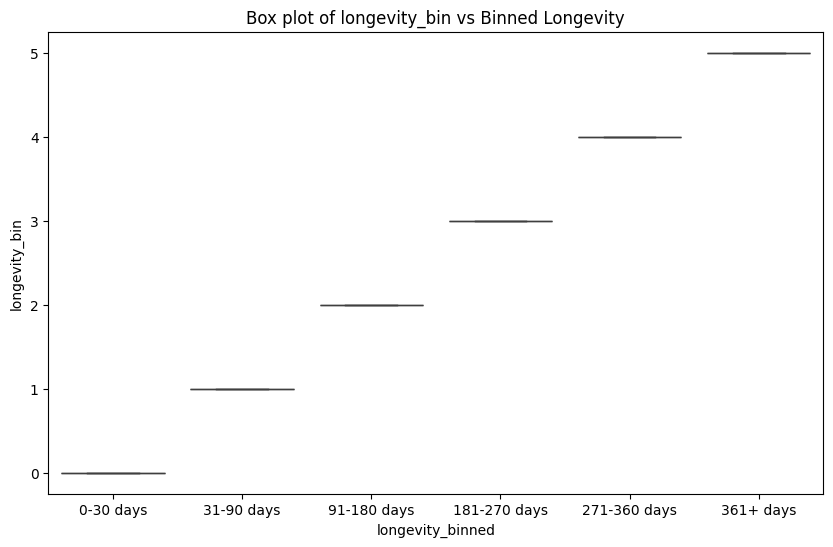

In [17]:
# Select numeric columns (float and int types)
numeric_cols = modelling_df.select_dtypes(include=['float64', 'int64']).columns

# Custom bins as provided
bins = [-1, 30, 90, 180, 270, 360, float('inf')]

# Create labels for the bins
bin_labels = ['0-30 days', '31-90 days', '91-180 days', '181-270 days', '271-360 days', '361+ days']

# Bin the 'longevity' variable using the defined edges
modelling_df['longevity_binned'] = pd.cut(modelling_df['longevity'], bins=bins, labels=bin_labels, right=True)

# Loop through numeric columns and create a violin plot for each against the binned 'longevity'
for col in numeric_cols:
    if col != 'longevity':  # Exclude plotting 'longevity' against itself
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.boxplot(x='longevity_binned', y=col, data=modelling_df)
        plt.title(f'Box plot of {col} vs Binned Longevity')
        plt.show()

## Features with outliers

- Trading frequency > 1k
- Profit loss variability > 10k
- Average trade duration > 3
- TP/SL Hit Ratio > 400
- Reward Risk Ratio min and maxes -5k < RR < 5k
- Average profit < -20k
- Average net deposit -2k < ND < 2k
- Net deposit frequency ratio > 1

In [27]:
# Outlier definitions
outlier_counts = {
    'Trading Frequency > 1000': (modelling_df['Trading_Frequency'] > 1000).sum(),
    'Profit Loss Variability > 10k': (modelling_df['Profit_Loss_Variability'] > 10000).sum(),
    'Average Trade Duration > 3M': (modelling_df['Average_Trade_Duration'] > 3000000).sum(),
    'TP/SL Hit Ratio > 400': (modelling_df['TP/SL Hit Ratio'] > 400).sum(),
    'Reward Risk Ratio < -5000 or > 5000': ((modelling_df['Reward_Risk_Ratio'] < -5000) | (modelling_df['Reward_Risk_Ratio'] > 5000)).sum(),
    'Average Profit < -20k': (modelling_df['Average_Profit'] < -20000).sum(),
    'Average Net Deposit not between -2k and 2k': ((modelling_df['average_net_deposit'] < -2000) | (modelling_df['average_net_deposit'] > 2000)).sum(),
    'Net Deposit Frequency Ratio > 1': (modelling_df['net_deposit_frequency_ratio'] > 1).sum(),
}
print('Number of outliers for given definitions\n')
# Display the count of outliers
for key, value in outlier_counts.items():
    print(f"{key}: {value}")

Number of outliers for given definitions

Trading Frequency > 1000: 4
Profit Loss Variability > 10k: 10
Average Trade Duration > 3M: 5
TP/SL Hit Ratio > 400: 5
Reward Risk Ratio < -5000 or > 5000: 4
Average Profit < -20k: 1
Average Net Deposit not between -2k and 2k: 3
Net Deposit Frequency Ratio > 1: 2
